## Importing Libraries

## Questions:
- If applicant is good but loan rejected - Interest Loss
- If applicant is bad but loan approved - Credit Loss


## Tasks:
- What are the driving Variables that help the bank to except or reject the loan.
-  Based on complete analysis Add the interestig insights/Build Rules to take decision .
- Checking shape, columns,head
- Zip file consisting  of jupyter notebook , presentation[PDF]- Interesting insights that you want to communicate with the bank(Important Observations/inference)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import plotly.express as px
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

## Importing Datasets

In [3]:
df_A = pd.read_csv('application_data.csv') # Latest Information

In [4]:
df_P = pd.read_csv('previous_application.csv') # Previous 

## Exploratory Data Analysis

### Exploring the Data

In [5]:
df_A.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Inference:**
- It consists of Target Variable and Varaibales that are potentially influencing Target Variable

In [6]:
df_A.shape

(307511, 122)

**Inference:**
- Big Data set consisting of `307511` rows and `122` columns

In [7]:
df_A.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#### Missing Values

In [8]:
df_A.CODE_GENDER.value_counts()    # XNA can be = to nan value

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Inference:**
- 'XNA' can be considered as null values. 

In [9]:
df_A.loc[df_A.CODE_GENDER=='XNA','CODE_GENDER']=np.nan # converting XNA to null value

In [10]:
df_A.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

**Inference:**
- 'XNA' can be considered as null values. 

In [11]:
df_A.loc[df_A.ORGANIZATION_TYPE=='XNA','CODE_GENDER']=np.nan

In [12]:
df_A.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                      55378
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
# Percentage of missing Values
null_mat = (df_A.isnull().sum()/len(df_A))*100

In [14]:
# Columns having null values more than 50 are to be dropped.
col_remove =null_mat[null_mat>50].index.to_list()

In [15]:
# Columns having null values between 10-15 percent to be imputed with Mean,Median and mode
col_impute =null_mat[(null_mat<15)&(null_mat>10)].index.to_list()

In [16]:
df_A[col_impute].describe() 

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Inference:**
-   std deviation suggests that the values(unique) are not quite spread therefore Mode could be used to impute the missing values . 

#### Datatype Checking

In [17]:
df_at = df_A.drop(col_remove ,axis=1) # Temporary dataset

In [18]:
df_at.dtypes     

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


**Inference:**
-   There are Categorical Varibales (Descrete) which can be converted to Object type
-   There are Continous Variables, can be converted to Float type.

#### Converting Negative Values to Positive



In [19]:
df_A.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


**Inference:**
-   These columns cannot have negative Values, they have to be converted to positives.

In [20]:
df_A.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH']=df_A.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'].abs() # Days Cannot be Negative 

#### Converting Categorical columns to Object type

In [21]:
l =list(df_A.nunique()[df_A.nunique()<50].index) #Columns having Less than 50 unique values should be categorical.

In [22]:
df_A.loc[:,l] = df_A.loc[:,l].astype(str) # type Casting into str

#### Converting int to float

In [23]:
int_col=df_A.select_dtypes(include='int64').columns.to_list() # Selecting numerical column

In [24]:
df_A.loc[:,int_col] = df_A.loc[:,int_col].astype('float')

#### Detecting Numerical Columns and Reporting Outliers

In [25]:
num_col=df_A.select_dtypes(include='float').columns.to_list() # Numerical columns were converted to float

In [26]:
df_A[num_col].describe() 

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,307510.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.061091,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,-962.858788
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,11.944812,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,826.808487
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,5.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700,0.976700,0.699400,0.007200,0.016600,0.054200,0.042700,0.000000,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.018700,0.051300,0.045700,0.000000,0.000000,0.041200,-1570.000000
50%,278202.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,9.000000,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600,0.755200,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000,0.074600,0.981600,0.764800,0.019000,0.045800,0.077100,0.073100,0.000000,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.048700,0.076100,0.074900,0.000000,0.003100,0

**Inference:**
-   It is observed that for the columns 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED' etc.. are skewed . Suggesting the presence of Outliers.

In [27]:
num_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED'] # Columns selected for outlier detection.

In [28]:
#Upper_fence=df_A[num_col].quantile(0.75)+(df_A[num_col].quantile(0.75)-df_A[num_col].quantile(0.25))*1.5 # Outlier : Q3+1.5*IQR
#Lower_fence=df_A[num_col].quantile(0.25)-(df_A[num_col].quantile(0.75)-df_A[num_col].quantile(0.25))*1.5 # Q1-1.5*IQR

In [29]:
# Creating a df with Fencing values 
#out=pd.DataFrame(Lower_fence)
#out['Upper_fence']=pd.DataFrame(Upper_fence)    
#out=out.rename(columns={0:'Lower_Fence','outlier1':'Upper_fence'})

In [30]:
out

,Lower_Fence,Upper_fence
AMT_INCOME_TOTAL,-22500.0,337500.0
AMT_CREDIT,-537975.0,1616625.0
AMT_ANNUITY,-10584.0,61704.0
AMT_GOODS_PRICE,-423000.0,1341000.0
DAYS_BIRTH,1509.5,30585.5
DAYS_EMPLOYED,-6228.0,12868.0


In [167]:
def get_outliers(num_col):
    for col in num_col:
        Upper_fence=df_A[col].quantile(0.75)+(df_A[col].quantile(0.75)-df_A[col].quantile(0.25))*1.5 # Outlier : Q3+1.5*IQR
        Lower_fence=df_A[col].quantile(0.25)-(df_A[col].quantile(0.75)-df_A[col].quantile(0.25))*1.5 # Q1-1.5*IQR
        print(col,':',len(df_A[(df_A['AMT_CREDIT']<Lower_fence)]),',',len(df_A[(df_A['AMT_CREDIT']>Upper_fence)][col]))
                         # Lower Fence                                      #Upper Fence

In [168]:
get_outliers(num_col)

AMT_INCOME_TOTAL : 0 , 203766
AMT_CREDIT : 0 , 6562
AMT_ANNUITY : 0 , 305971
AMT_GOODS_PRICE : 0 , 16671
DAYS_BIRTH : 0 , 307511
DAYS_EMPLOYED : 0 , 307511


**Inference** :
- These Outliers can be Capped/Binned based using the domain knowledge for example INCOME TOTAL can be Binned as Very High Income Groups.
- Days Employed could be Capped as there are potential wrong entries which are more than 80 years.

#### Binning

In [31]:
# To understand distribution of AMT_INCOME_TOTAL for binning
df_A['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
# Binning AMT_INCOME_TOTAL into 'poor','below_middle','above_middle','rich' to have categorical data type
df_A['AMT_INCOME_CLASS']=pd.cut(df_A['AMT_INCOME_TOTAL'],[25000,112500,150000,200000,120000000],
                                labels=['low','avg','high','very high'])

In [33]:
# Converting DAYS_BIRTH to AGE in years as AGE
df_A.loc[:,'AGE']=df_A.loc[:,'DAYS_BIRTH'].div(365)


In [34]:
# To understand distribution of AMT_INCOME_TOTAL for binning
df_A['AGE'].describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [35]:
# Binning AGE to have categorical data type
df_A['AGE']=pd.cut(df_A['AGE'],[20,30,40,50,60,70],
                                labels=['20-30','30-40','40-50','50-60','60-70'])

### Analytics

#### Selecting Columns

In [36]:
# New dataframe for analytics
# Choosing 20-25 columns for analytics
df_app=df_A.iloc[:,1:16]
# Adding important columns
df_app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','AGE','AMT_INCOME_CLASS']]=df_A.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','AGE','AMT_INCOME_CLASS']]

In [37]:
df_app.shape

(307511, 24)

In [38]:
df_app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,AMT_INCOME_CLASS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.083037,0.262949,0.139376,9461.0,637.0,Laborers,1.0,20-30,very high
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.311267,0.622246,NaN,16765.0,1188.0,Core staff,2.0,40-50,very high
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,0.555912,0.729567,19046.0,225.0,Laborers,1.0,50-60,low
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,NaN,0.650442,NaN,19005.0,3039.0,Laborers,2.0,50-60,avg
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,0.322738,NaN,19932.0,3038.0,Core staff,1.0,50-60,avg


#### Checking for Imbalance 

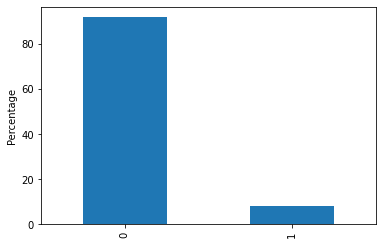

In [39]:
# Normalizing the valuecounts gives the proportions of 0's and 1's
(df_app.TARGET.value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.show()

**Inference:**
-   This is quite an unbalanced dataset with non defaulters contributed about 92 percent.

In [40]:
df_1=df_app[df_app['TARGET']=='1'].reset_index() # DataFrame for defaulted ones
df_2=df_app[df_app['TARGET']=='0'].reset_index() # DataFrame for non-defaulted ones

### Univariate Analysis

#### Categorical Colummns

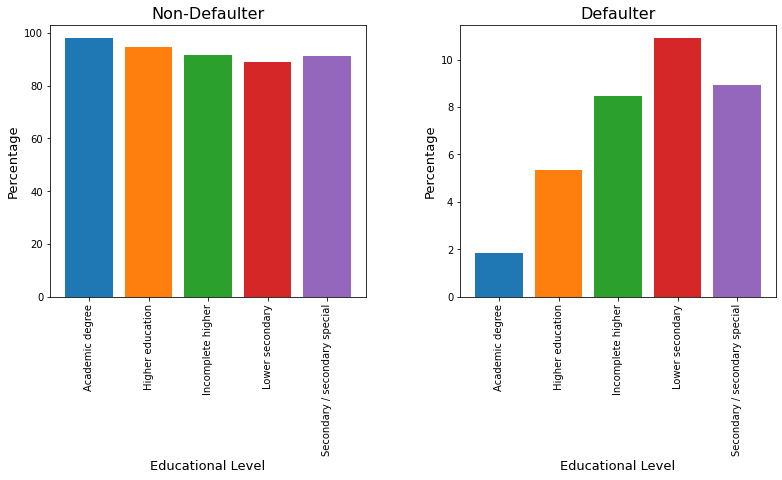

In [41]:
plt.figure(figsize=(13,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['NAME_EDUCATION_TYPE'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Educational Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Educational Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=0.3)
plt.show() 

**Inference** :
- Customers having Academic Degree had less difficulties in paying the loan  (# Rule)
- Customers with Lower Secondary certificate had more difficulties in paying the loan 

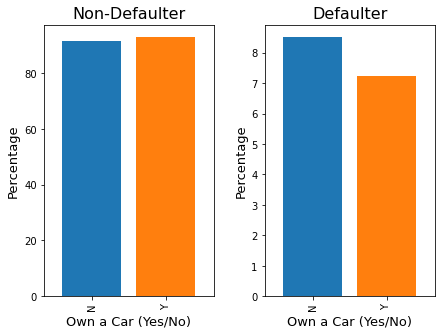

In [42]:
plt.figure(figsize=(7,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['FLAG_OWN_CAR'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange"])


plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own a Car (Yes/No)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own a Car (Yes/No)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- No strong pattern is observed.

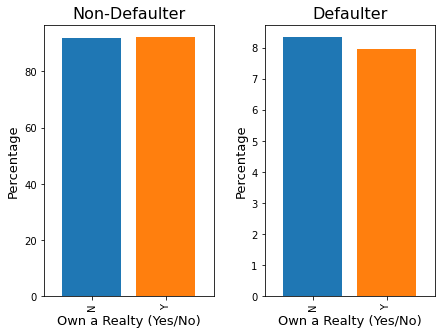

In [43]:
plt.figure(figsize=(7,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['FLAG_OWN_REALTY'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange"])

plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own a Realty (Yes/No)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own a Realty (Yes/No)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- No strong pattern is observed.

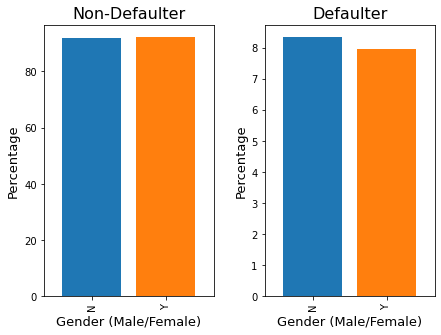

In [44]:
plt.figure(figsize=(7,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['FLAG_OWN_REALTY'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange"])

plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Gender (Male/Female)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Gender (Male/Female)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- No strong pattern is observed.

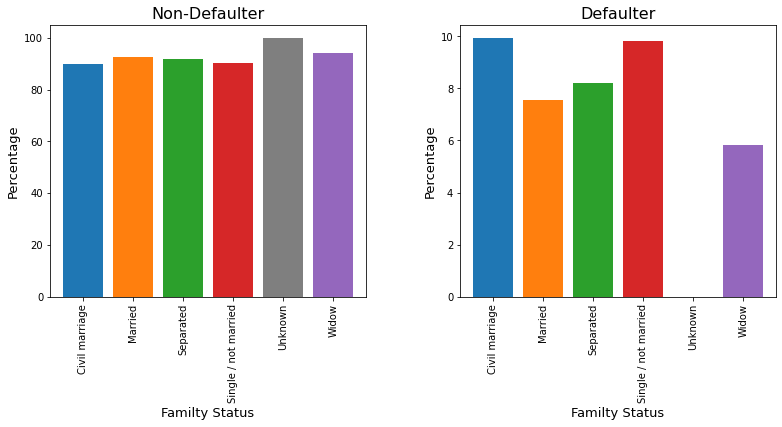

In [45]:
plt.figure(figsize=(13,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['NAME_FAMILY_STATUS'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red",'tab:gray',"tab:purple"])

plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Familty Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Familty Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- Single/un-married are most likely to default(#Rule).Although Civil Marriage people have higher defaulting percentage it is not a plausible explanation, just like Unknow Category in non-defaulters.


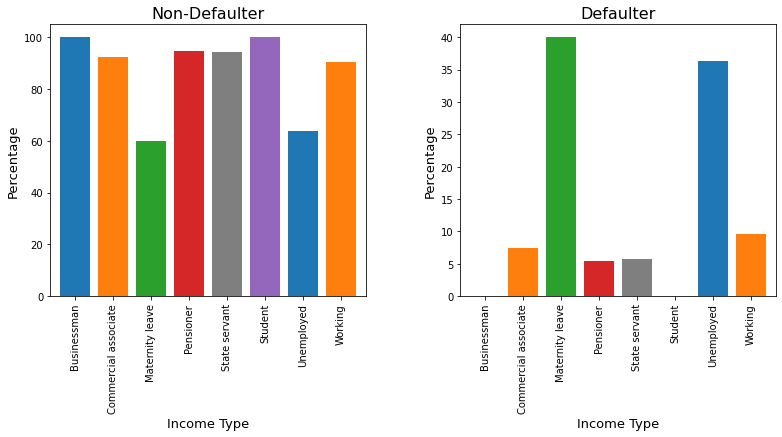

In [46]:
plt.figure(figsize=(13,5))
df_temp=pd.concat([df_1,df_2])
k=df_temp.groupby([df_temp['NAME_INCOME_TYPE'],df_temp['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red",'tab:gray',"tab:purple"])

plt.subplot(1,2,1)
k.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
k.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- Although buisinessmen and students have cleared the loans, Pensioner and State Servant are qualified Income types and have less difficulties in Paying the loan (#Rule).


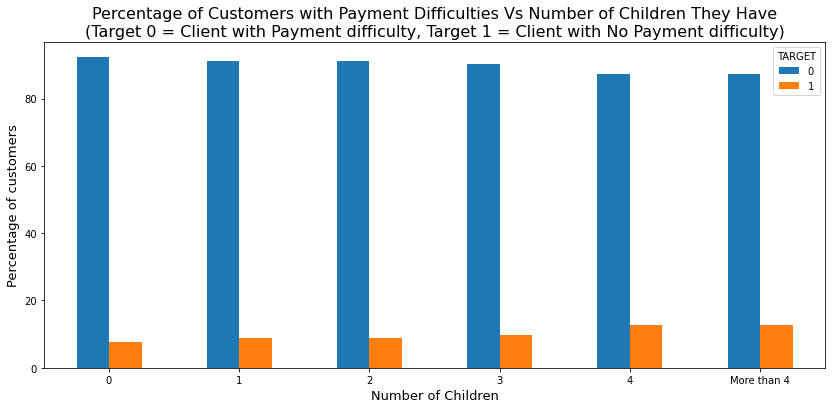

In [47]:

app=pd.concat([df_1,df_2])
app['CNT_CHILDREN']=app['CNT_CHILDREN'].astype(int)
app['CNT_CHILDREN']=app['CNT_CHILDREN'].apply(lambda x: 5 if x>4 else x)
app['CNT_CHILDREN']=app['CNT_CHILDREN'].astype(str)
app['CNT_CHILDREN']=app['CNT_CHILDREN'].apply(lambda x: 'More than 4' if x=='5' else x)

k=app.groupby([app['CNT_CHILDREN'],app['TARGET']]).size().unstack(level=1) 
a=k[:].sum(axis=1)
k=k.iloc[:].div(a,axis=0)*100
k.plot(kind='bar',figsize=(14,6))

plt.title("\n".join(['Percentage of Customers with Payment Difficulties Vs Number of Children They Have',
                       '(Target 0 = Client with Payment difficulty, Target 1 = Client with No Payment difficulty)']), fontdict={'fontsize': 16 ,'fontweight': 15,'color': 'black'})
plt.ylabel('Percentage of customers', fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Number of Children', fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='horizontal')
plt.show()

**Inference** :
- As the number of children goes higher, the probability of default also goes higher by a slight margin

#### Numerical Columns

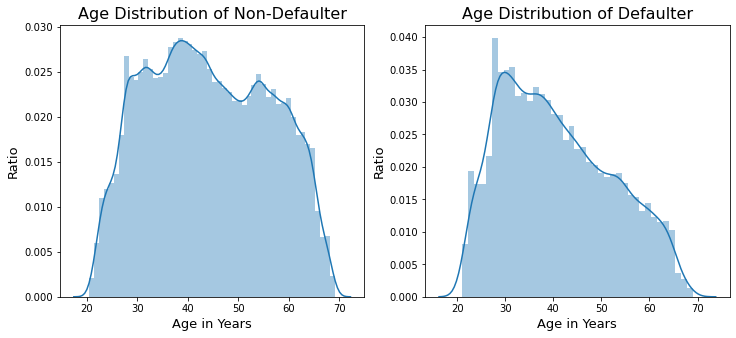

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.distplot(df_1['DAYS_BIRTH'].div(365),hist=True,label='Defaulter')
plt.title('Age Distribution of Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Age in Years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Ratio',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,1)
sns.distplot(df_2['DAYS_BIRTH'].div(365),hist=True,label='Non-Defaulter')
plt.title('Age Distribution of Non-Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Age in Years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Ratio',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.show()

**Inference** :
- Age more than 50 the frequency of Defaulting is significantly less.

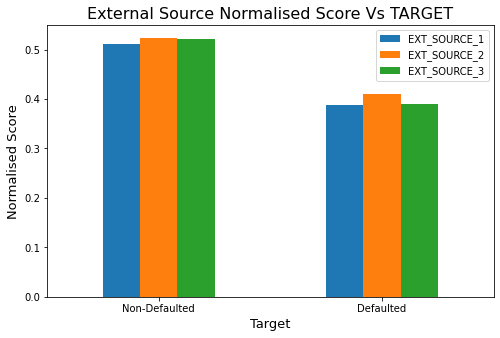

In [49]:
tp1=df_2.loc[:,['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
tp2=df_1.loc[:,['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
tp1=tp1.groupby('TARGET').mean()
tp2=tp2.groupby('TARGET').mean()
tp=pd.concat([tp1,tp2])

plot = tp[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].plot(kind='bar',stacked=False,figsize=(8,5))
plot.set_title('External Source Normalised Score Vs TARGET',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plot.set_xlabel("Target",fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plot.set_ylabel("Normalised Score",fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plot.set_xticklabels(['Non-Defaulted','Defaulted'],rotation='horizontal')
plt.show()

**Inference** :
- It is clear Customers having score greater than 0.45 across all external source are less likely to default.(#rule)

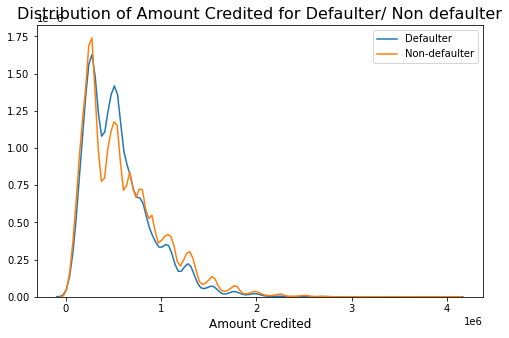

In [50]:
# Analysing the income distribution of Defaulters and Non-defaulters
plt.figure(figsize=(8,5))
sns.distplot(df_1['AMT_CREDIT'],hist=False,label='Defaulter')
sns.distplot(df_2['AMT_CREDIT'],hist=False,label='Non-defaulter')
plt.title('Distribution of Amount Credited for Defaulter/ Non defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})
plt.show()

**Inference** :
- Amount Credited is not a good measure to classify the customer. 

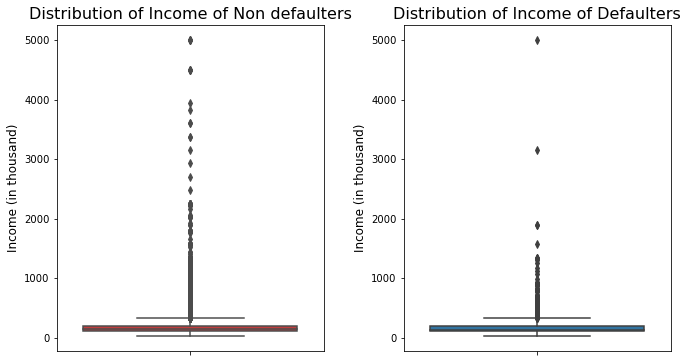

In [51]:
# Capping highly extreme outlier (because it is distroiting the visualization that we would have otherwise got) 
# to have nice boxplot distribution
df_1['AMT_INCOME_TOTAL']=df_1['AMT_INCOME_TOTAL'].apply(lambda x: 5000000 if x>5000000 else x) 
df_2['AMT_INCOME_TOTAL']=df_2['AMT_INCOME_TOTAL'].apply(lambda x: 5000000 if x>5000000 else x) 


plt.figure(figsize=(11,6))
plt.subplot(1,2,2)
sns.boxplot(df_1['AMT_INCOME_TOTAL'].div(1000),orient='v',color='tab:blue')
plt.title('Distribution of Income of Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (in thousand)',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,1)
sns.boxplot(df_2['AMT_INCOME_TOTAL'].div(1000),orient='v',color='tab:red')
plt.title('Distribution of Income of Non defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (in thousand)',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- It is unlikely that higher income customer will have difficulties to pay the loan but the Defaulters plot also suggests that there might be a case ot two that is likely. 

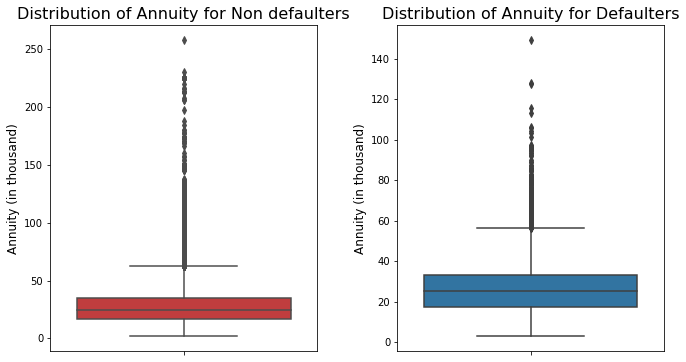

In [52]:

plt.figure(figsize=(11,6))
plt.subplot(1,2,2)
sns.boxplot(df_1['AMT_ANNUITY'].div(1000),orient='v',color='tab:blue')
plt.title('Distribution of Annuity for Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Annuity (in thousand)',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,1)
sns.boxplot(df_2['AMT_ANNUITY'].div(1000),orient='v',color='tab:red')
plt.title('Distribution of Annuity for Non defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Annuity (in thousand)',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- The distribution of annuity cannot be a good maeasure of classifying the type of customer.

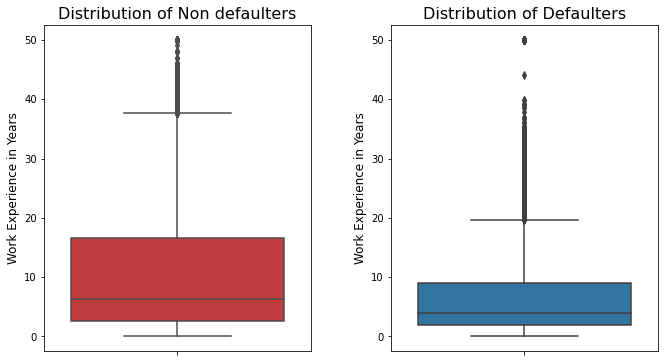

In [53]:
# Capping highly extreme outlier (because days_employed has one entry which states 1000 years which is not possible) 
# to have nice boxplot distribution
df_1['DAYS_EMPLOYED']=df_1['DAYS_EMPLOYED'].apply(lambda x: 50*365 if x>50*365 else x) # Cap values beyond 50 years to 50 years
df_2['DAYS_EMPLOYED']=df_2['DAYS_EMPLOYED'].apply(lambda x: 50*365 if x>50*365 else x) 

plt.figure(figsize=(11,6))
plt.subplot(1,2,2)
sns.boxplot(df_1['DAYS_EMPLOYED'].div(365),orient='v',color='tab:blue')
plt.title('Distribution of Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experience in Years',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,1)
sns.boxplot(df_2['DAYS_EMPLOYED'].div(365),orient='v',color='tab:red')
plt.title('Distribution of Non defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experience in Years',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})
plt.subplots_adjust(wspace=0.3)
plt.show()

**Inference** :
- As the Common Experience between Non-Defaulters and the Defaulters is 0-20 years it would be suggested to also look into other aspects such and income type will considering [0-20] experinece groups. (#rule)

#### Bivariate Analysis

In [54]:
df_1.dtypes

index                     int64
TARGET                   object
NAME_CONTRACT_TYPE       object
CODE_GENDER              object
FLAG_OWN_CAR             object
FLAG_OWN_REALTY          object
CNT_CHILDREN             object
AMT_INCOME_TOTAL        float64
AMT_CREDIT              float64
AMT_ANNUITY             float64
AMT_GOODS_PRICE         float64
NAME_TYPE_SUITE          object
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
NAME_HOUSING_TYPE        object
EXT_SOURCE_1            float64
EXT_SOURCE_2            float64
EXT_SOURCE_3            float64
DAYS_BIRTH              float64
DAYS_EMPLOYED           float64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS          object
AGE                    category
AMT_INCOME_CLASS       category
dtype: object

##### Continous vs Continous

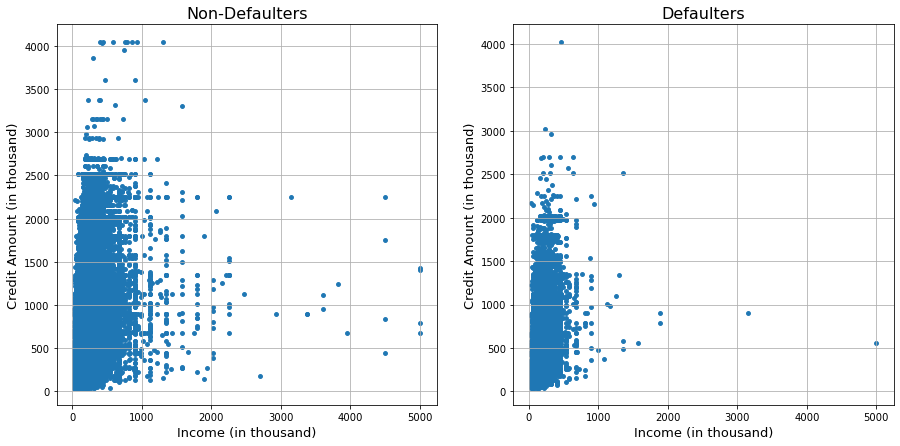

In [55]:

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(df_2.AMT_INCOME_TOTAL.div(1000),df_2.AMT_CREDIT.div(1000),s=15)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df_1.AMT_INCOME_TOTAL.div(1000),df_1.AMT_CREDIT.div(1000),s=15)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference** :
- No special inference can be drawn from this plots, they are almost same except the fact that defaulted has less data points 

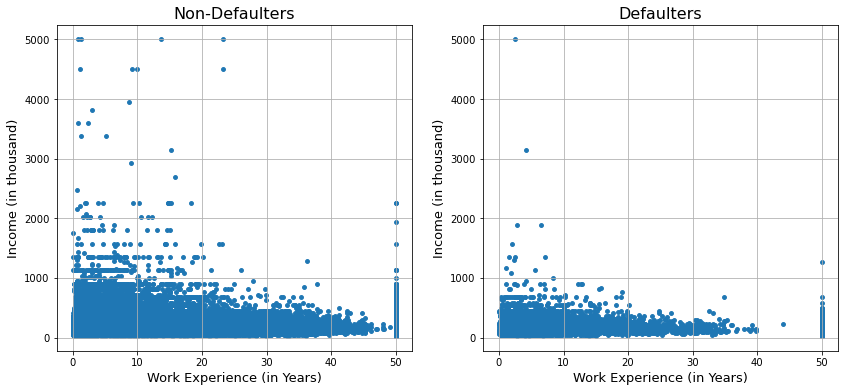

In [56]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(df_2.DAYS_EMPLOYED.div(365),df_2.AMT_INCOME_TOTAL.div(1000),s=15)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Work Experience (in Years)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df_1.DAYS_EMPLOYED.div(365),df_1.AMT_INCOME_TOTAL.div(1000),s=15)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Work Experience (in Years)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()


plt.show()

**Inference** :
- No special inference can be drawn from this plots, they are almost same except the fact that defaulted has less data points 

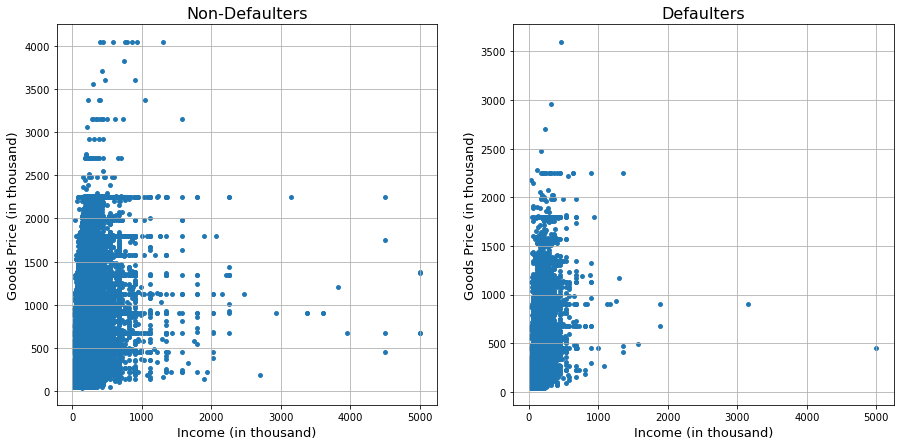

In [57]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(df_2.AMT_INCOME_TOTAL.div(1000),df_2.AMT_GOODS_PRICE.div(1000),s=15)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Goods Price (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df_1.AMT_INCOME_TOTAL.div(1000),df_1.AMT_GOODS_PRICE.div(1000),s=15)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Goods Price (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference** :
- No special inference can be drawn from this plots, they are almost same except the fact that defaulted has less data points 


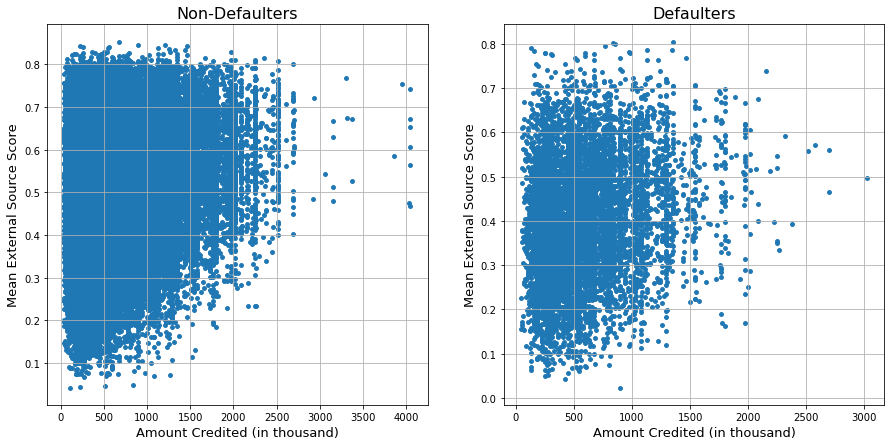

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(df_2.AMT_CREDIT.div(1000),(df_2.EXT_SOURCE_1+df_2.EXT_SOURCE_2+df_2.EXT_SOURCE_3).div(3),s=15)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Mean External Source Score',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df_1.AMT_CREDIT.div(1000),(df_1.EXT_SOURCE_1+df_1.EXT_SOURCE_2+df_1.EXT_SOURCE_3).div(3),s=15)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Mean External Source Score',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference** :
- No special inference can be drawn from this plots, they are almost same except the fact that defaulted has less data points 


#### Conclusion: Hence combinations of numerical attributes doesn't influence TARGET variable in a strong sense

##### Continous vs Categorical

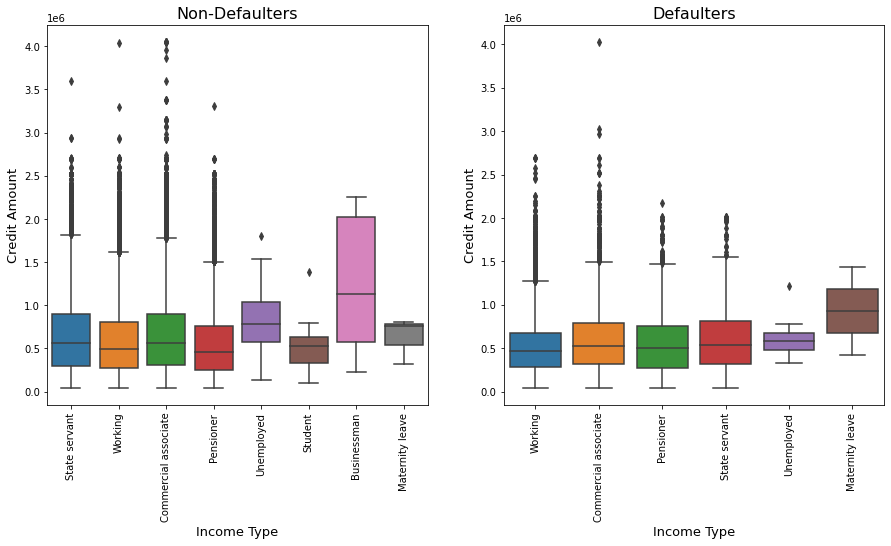

In [59]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(df_2.NAME_INCOME_TYPE ,df_2.AMT_CREDIT)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 90)

plt.subplot(1,2,2)
sns.boxplot(df_1.NAME_INCOME_TYPE ,df_1.AMT_CREDIT)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 90)

plt.show()

**Inference:**
- State Servants and Pensioners are the qualified Working class[data samples] are less likely to default . (# Rule)
- We cannot infere that people on Maternity Leave have higher chances of Defaulting as there are only few observations compared to other observations

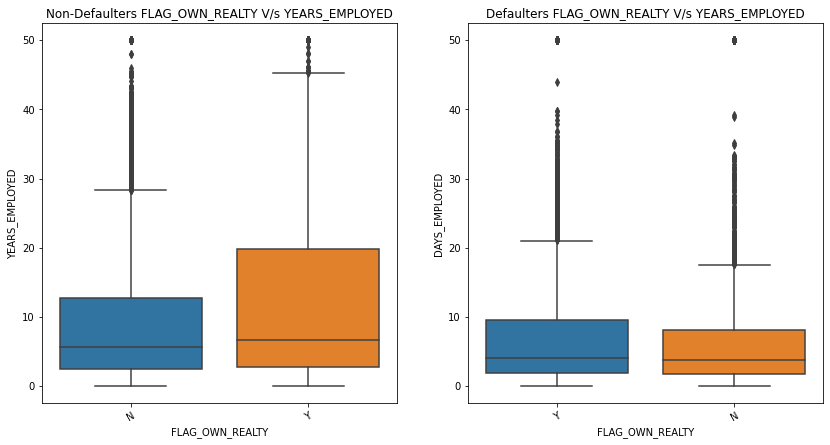

In [60]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(df_2.FLAG_OWN_REALTY  ,df_2.DAYS_EMPLOYED.div(365))
plt.title('Non-Defaulters FLAG_OWN_REALTY V/s YEARS_EMPLOYED')
plt.ylabel('YEARS_EMPLOYED')
plt.xticks(rotation= 30)
plt.subplot(1,2,2)
plt.title('Defaulters FLAG_OWN_REALTY V/s YEARS_EMPLOYED')
plt.ylabel('YEARS_EMPLOYED')
plt.xticks(rotation= 30)
sns.boxplot(df_1.FLAG_OWN_REALTY  ,df_1.DAYS_EMPLOYED.div(365))
plt.show()

**Inference:**
- The customers that are owning a Realty and having 10 - 20 years of experience are mostly likely to pay the loan. (# Rule)

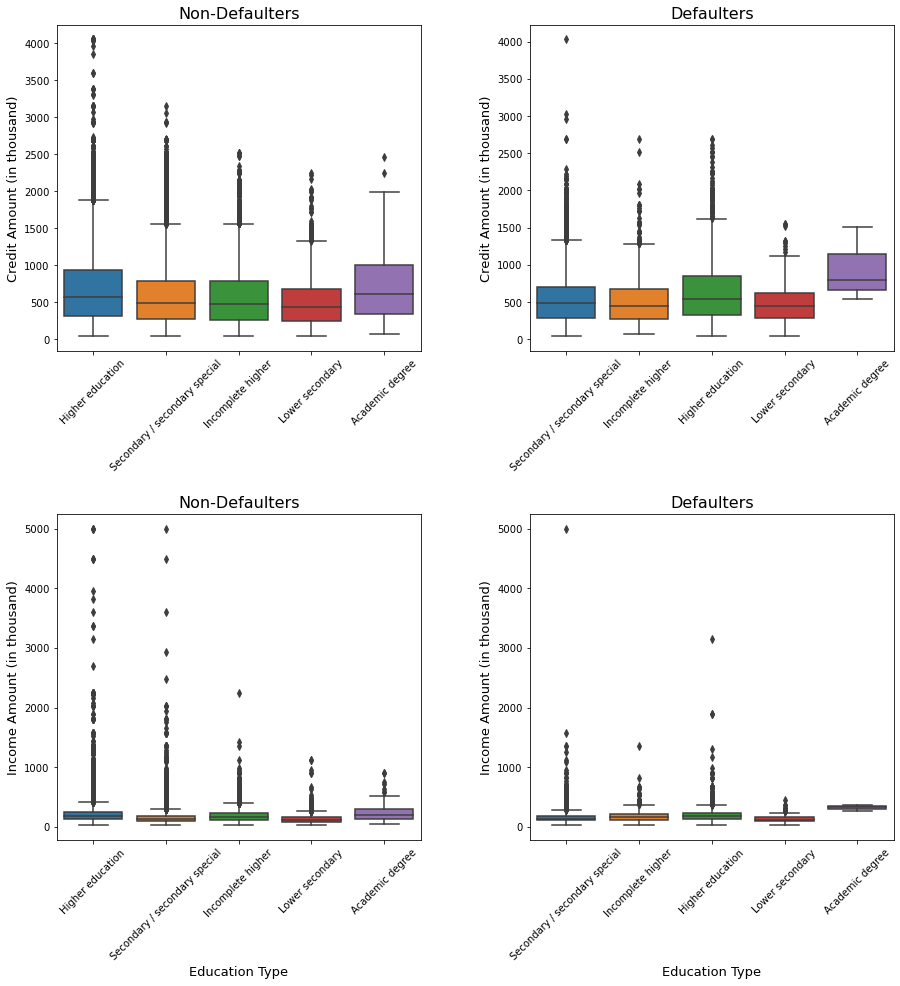

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(df_2.NAME_EDUCATION_TYPE ,df_2.AMT_CREDIT.div(1000))
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 45)

plt.subplot(2,2,2)
sns.boxplot(df_1.NAME_EDUCATION_TYPE ,df_1.AMT_CREDIT.div(1000))
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Credit Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 45)

plt.subplot(2,2,3)
sns.boxplot(df_2.NAME_EDUCATION_TYPE ,df_2.AMT_INCOME_TOTAL.div(1000))
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Education Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Income Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 45)

plt.subplot(2,2,4)
sns.boxplot(df_1.NAME_EDUCATION_TYPE ,df_1.AMT_INCOME_TOTAL.div(1000))
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Education Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Income Amount (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation= 45)

plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

**Inference:**
- Here we see that median income of people with academic degree is higher than that of other and also the amount credited by them is proportionate and hence from the univariate analysis we observed that people with Academic degree have very less defaulters
- The defaulters with academic degree have very high median as compared to other however, the credit they have taken is comparatively less than others

##### Categorical vs Categorical

In [62]:
df_1.dtypes

index                     int64
TARGET                   object
NAME_CONTRACT_TYPE       object
CODE_GENDER              object
FLAG_OWN_CAR             object
FLAG_OWN_REALTY          object
CNT_CHILDREN             object
AMT_INCOME_TOTAL        float64
AMT_CREDIT              float64
AMT_ANNUITY             float64
AMT_GOODS_PRICE         float64
NAME_TYPE_SUITE          object
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
NAME_HOUSING_TYPE        object
EXT_SOURCE_1            float64
EXT_SOURCE_2            float64
EXT_SOURCE_3            float64
DAYS_BIRTH              float64
DAYS_EMPLOYED           float64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS          object
AGE                    category
AMT_INCOME_CLASS       category
dtype: object

<Figure size 432x288 with 0 Axes>

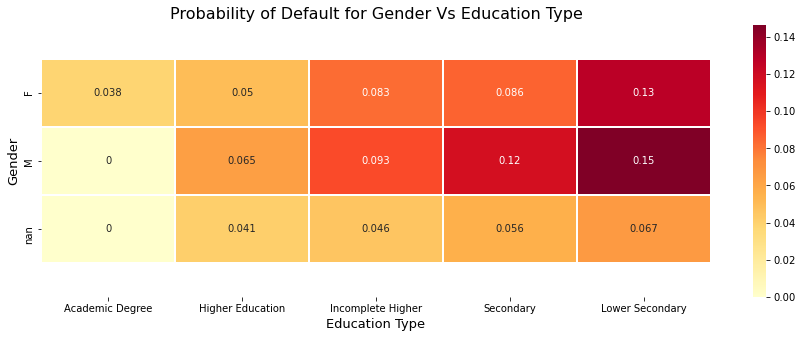

In [96]:
# Heat Map- More intuitive plot
plt.figure(2)
plt.figure(figsize=[15,5])
df_temp['TARGET'] = df_temp['TARGET'].astype(int) 
df_temp_1 =df_temp.pivot_table(index=['CODE_GENDER'],columns=['NAME_EDUCATION_TYPE'],values =['TARGET'],aggfunc=np.mean)
columns_titles=[('TARGET', 'Academic degree'), ('TARGET', 'Higher education'), ('TARGET', 'Incomplete higher'),
                ('TARGET', 'Secondary / secondary special'),('TARGET', 'Lower secondary')]
df_temp_1=df_temp_1.reindex(columns=columns_titles)

sns.heatmap(df_temp_1, cmap='YlOrRd',annot=True,linewidth=0.5)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for Gender Vs Education Type',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Education Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Gender',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0.5,1.5,2.5,3.5,4.5],['Academic Degree','Higher Education','Incomplete Higher','Secondary','Lower Secondary'],rotation='horizontal')
plt.show()

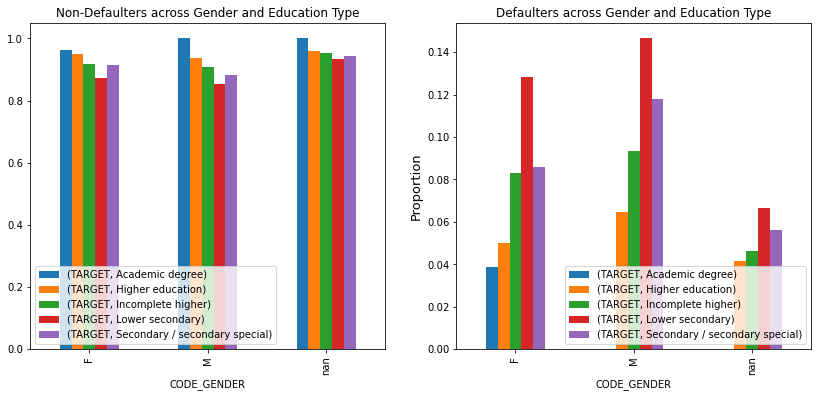

In [116]:
# Visually Pleasing plot
fig, axes = plt.subplots(nrows=1, ncols=2)
df_temp_2 = 1-df_temp_1

ax = df_temp_2.plot(kind='bar',figsize=(14,6),title='Non-Defaulters across Gender and Education Type',ax=axes[0])
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='lower left')
plt.ylabel('Proportion',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
df_temp_1.plot(kind='bar',title ='Defaulters across Gender and Education Type',ax=axes[1]).legend(patches, labels, loc='lower right')
plt.show()

**Inference:**

- We see Male with Academic Degree are the least defaulters whereas males with Lower Secondary Education are among highest.
- Also as the Education type goes better the probability of default goes down

<Figure size 432x288 with 0 Axes>

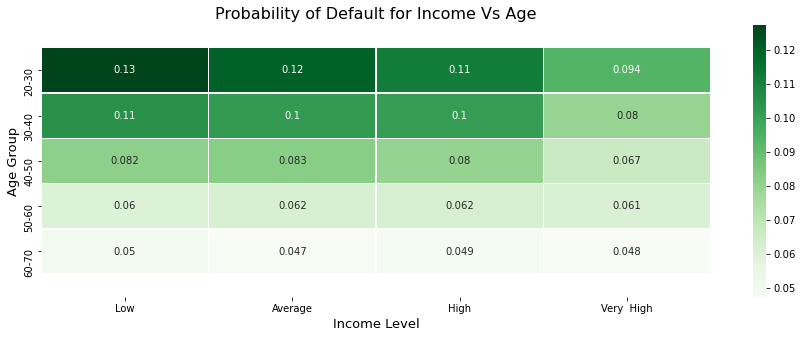

In [64]:
plt.figure(2)
plt.figure(figsize=[15,5])
df_temp['TARGET'] = df_temp['TARGET'].astype(int) 
df_temp_1 =df_temp.pivot_table(index=['AGE'],columns=['AMT_INCOME_CLASS'],values =['TARGET'],aggfunc=np.mean)
sns.heatmap(df_temp_1, cmap='Greens',annot=True,linewidth=0.5)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for Income Vs Age',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Age Group',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0.5,1.5,2.5,3.5],['Low','Average','High','Very  High'],rotation='horizontal')
plt.show()

**Inference:**

- As the age group and Income level increase the possibility of paying back the loan increase which means the possibility of default decrease. If we go about the exact opposite we see the group of highest defaulters

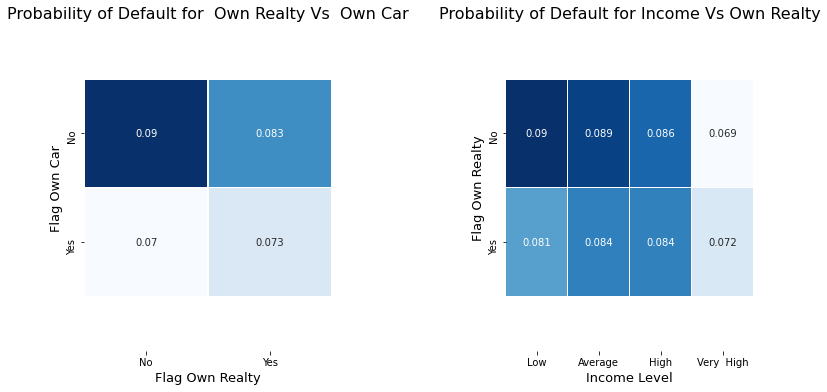

In [65]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
df_temp['TARGET'] = df_temp['TARGET'].astype(int) 
df_temp_1 =df_temp.pivot_table(index=['FLAG_OWN_CAR'],columns=['FLAG_OWN_REALTY'],values =['TARGET'],aggfunc=np.mean)
sns.heatmap(df_temp_1, cmap='Blues',annot=True,linewidth=0.5,cbar=False)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for  Own Realty Vs  Own Car',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Flag Own Realty',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Flag Own Car',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0.5,1.5],['No','Yes'],rotation='horizontal')
plt.yticks([0.5,1.5],['No','Yes'],rotation='vertical')

plt.subplot(1,2,2)
df_temp['TARGET'] = df_temp['TARGET'].astype(int) 
df_temp_1 =df_temp.pivot_table(index=['FLAG_OWN_REALTY'],columns=['AMT_INCOME_CLASS'],values =['TARGET'],aggfunc=np.mean)
sns.heatmap(df_temp_1, cmap='Blues',annot=True,linewidth=0.5,cbar=False)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for Income Vs Own Realty',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Flag Own Realty',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.yticks([0.5,1.5],['No','Yes'],rotation='vertical')
plt.xticks([0.5,1.5,2.5,3.5],['Low','Average','High','Very  High'],rotation='horizontal')
plt.subplots_adjust(wspace=0.7)
plt.show()

**Inference:**<br>
**PLOT1**:
- We see clients having a car but not a realty have the least probability of default whereas the clients netiher having a car nor the realty has the highest probability. However this is not a strong influence.
**PLOT2**:
- We see that clients having low income level and no realty are the most probable defaulters whereas the very high income clients whether they own a realty or not are the least probable defaulters

#### Correlation

##### Correlation for Defaulted customer

In [66]:
corr=df_1.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(10)

,var1,var2,Correlation,Correlation_Abs
42,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
32,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
98,DAYS_EMPLOYED,DAYS_BIRTH,0.625400,0.625400
85,DAYS_BIRTH,EXT_SOURCE_1,0.570054,0.570054
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.375642,0.375642
95,DAYS_EMPLOYED,EXT_SOURCE_1,0.337184,0.337184
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.308684,0.308684
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.306975,0.306975
54,EXT_SOURCE_1,AMT_GOODS_PRICE,0.188550,0.188550


**Inference:**
- AMT_GOODS_PRICE and AMT_CREDIT are having very high correlation leading to multicollinearity, therfore it is suggested to drop 'AMT_GOODS_PRICE' 
- AMT_ANNUITY and AMT_CREDIT are having very high correlation leading to multicollinearity, therfore it is suggested to drop 'AMT_ANNUITY' 

##### Correlation for Non-Defaulted customer

In [67]:
corr=df_2.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(10)

,var1,var2,Correlation,Correlation_Abs
42,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
32,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
98,DAYS_EMPLOYED,DAYS_BIRTH,0.675458,0.675458
85,DAYS_BIRTH,EXT_SOURCE_1,0.601210,0.601210
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.450391,0.450391
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.378313,0.378313
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.371233,0.371233
95,DAYS_EMPLOYED,EXT_SOURCE_1,0.361528,0.361528
65,EXT_SOURCE_2,EXT_SOURCE_1,0.197892,0.197892


 **Inference:**
 
- In both cases defaulted and non defaulted, the top5 highest correlation are same
- AMT_CREDIT and AMT_INCOME_TOTAL have a decent correlation(0.45),suggests that the income should be considered while setting the amt_CREDIT to avoid Default (#Rule)

----------------------------------------------------------------------

In [68]:
df_P

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


#### Inference:
- Target Variable and 122 columns[Latest Information]
- If a person is Defaulted or not 

In [69]:
df_main = pd.merge(df_A,df_P,on='SK_ID_CURR',how='left', suffixes=('_A', '_P')) # Merged df # To consider New customers.

In [70]:
col = [
 'TARGET',
 'NAME_CONTRACT_TYPE_A',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_A',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'AGE',
 'AMT_INCOME_CLASS',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'AMT_CREDIT_P',
 'NAME_CONTRACT_TYPE_P',
 'AMT_DOWN_PAYMENT',
'NAME_CLIENT_TYPE',
'NAME_PAYMENT_TYPE']

In [71]:
# New Data Set contaning columns from Previous Application
df_main = df_main[col]

In [72]:
df_main.dtypes

TARGET                    object
NAME_CONTRACT_TYPE_A      object
CODE_GENDER               object
FLAG_OWN_CAR              object
FLAG_OWN_REALTY           object
CNT_CHILDREN              object
AMT_INCOME_TOTAL         float64
AMT_CREDIT_A             float64
NAME_INCOME_TYPE          object
NAME_EDUCATION_TYPE       object
NAME_FAMILY_STATUS        object
NAME_HOUSING_TYPE         object
EXT_SOURCE_1             float64
EXT_SOURCE_2             float64
EXT_SOURCE_3             float64
DAYS_BIRTH               float64
DAYS_EMPLOYED            float64
OCCUPATION_TYPE           object
CNT_FAM_MEMBERS           object
AGE                     category
AMT_INCOME_CLASS        category
NAME_CONTRACT_STATUS      object
CODE_REJECT_REASON        object
AMT_CREDIT_P             float64
NAME_CONTRACT_TYPE_P      object
AMT_DOWN_PAYMENT         float64
NAME_CLIENT_TYPE          object
NAME_PAYMENT_TYPE         object
dtype: object

In [74]:
df_main_0 = df_main.loc[df_main['TARGET']=='0'] # Target =0
df_main_1 = df_main.loc[df_main['TARGET']=='1'] # Target =1
df_main_A  = df_main.loc[df_main['NAME_CONTRACT_STATUS']=='Approved'] # Approved
df_main_C  = df_main.loc[df_main['NAME_CONTRACT_STATUS']=='Canceled'] # Canceled
df_main_R  = df_main.loc[df_main['NAME_CONTRACT_STATUS']=='Refused'] # Refused
df_main_U  = df_main.loc[df_main['NAME_CONTRACT_STATUS']=='Unused offer'] # Unused Offer

#### Univariate Analysis

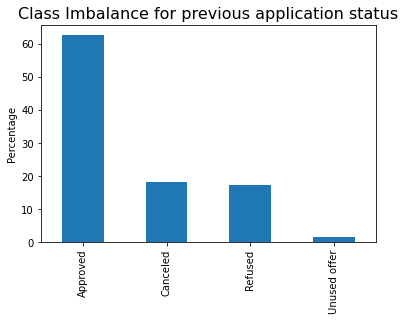

In [75]:
# Normalizing the valuecounts gives the proportions of Accepted, Cancelled, Refused and Unused
(df_main.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Class Imbalance for previous application status',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage')
plt.show()

**Inference**
- Most of the previous applications were approved however there is a high class imbalance between different outcomes

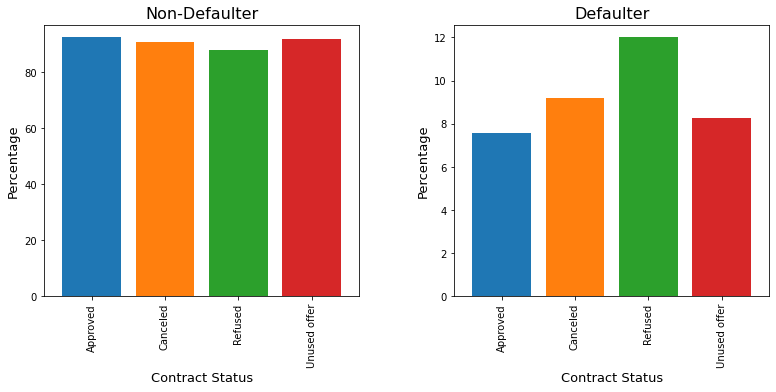

In [76]:
plt.figure(figsize=(13,5))
k1=df_main.groupby([df_main['NAME_CONTRACT_STATUS'],df_main['TARGET']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(1,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Contract Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Contract Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=0.3)
plt.show() 

**Inference**
- For non defaulters case there is not much difference between the contract status however, for defaulter's case the percentage of refused loans are higher which is a good incdiator 

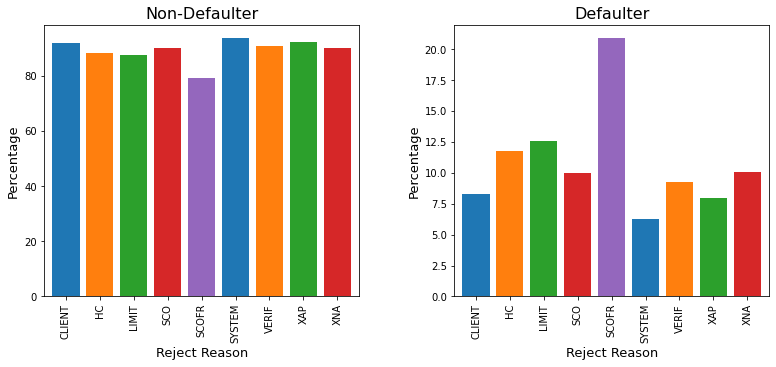

In [77]:
plt.figure(figsize=(13,5))
k1=df_main.groupby([df_main['CODE_REJECT_REASON'],df_main['TARGET']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(1,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Non-Defaulter',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Reject Reason',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Defaulter', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Reject Reason',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=0.3)
plt.show() 

**Inference**
- We see that SCOFR is a good paramter as it the rejected reason for the loans for large probability of defaulting customers.
- Also we observe that there are reject reasons for non defaulters in current case which may be due to their previous inability to hace the credit or may be due to error in estimation by bank to give the credit 

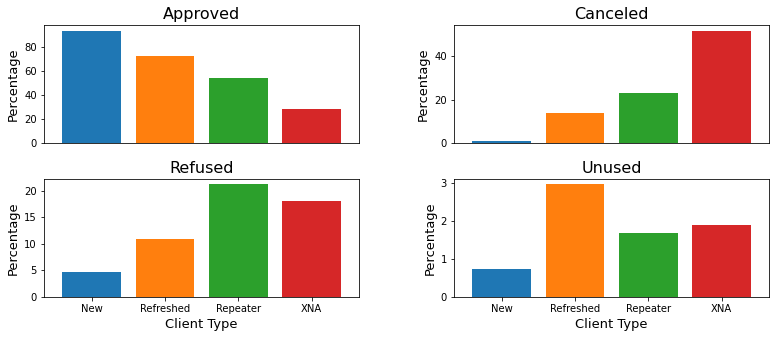

In [78]:
plt.figure(figsize=(13,5))
k1=df_main.groupby([df_main['NAME_CLIENT_TYPE'],df_main['NAME_CONTRACT_STATUS']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(2,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Canceled', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,3)
k1.iloc[:,2].plot(kind='bar',color=c,width=0.8)
plt.title('Refused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Client Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='horizontal')

plt.subplot(2,2,4)
k1.iloc[:,3].plot(kind='bar',color=c,width=0.8)
plt.title('Unused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Client Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks(rotation='horizontal')

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show() 

**Inference**:
- There are lot of new customers whose loans have been approved
- 20% of Repeater Customers, have been declined loan, probing into their credit history would give a strong factor .

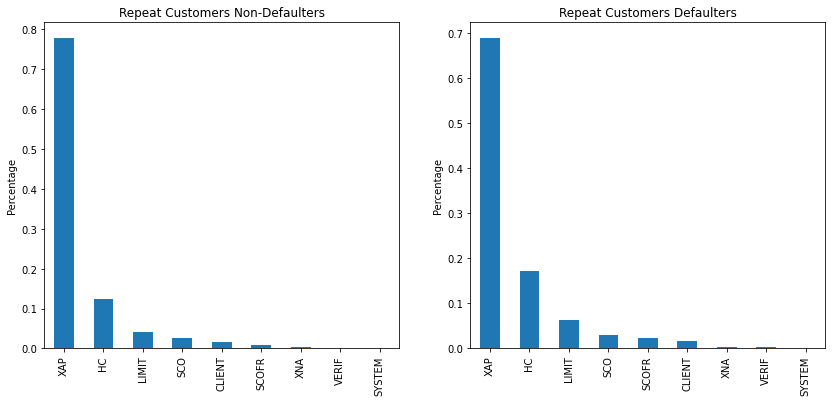

In [206]:
# Repeater Applicants Reject Reason - Univariate
plt.subplot(1,2,1)
df_main_0[(df_main_0['NAME_CLIENT_TYPE']=='Repeater')]['CODE_REJECT_REASON'].value_counts(normalize=True).plot(kind='bar',title = 'Repeat Customers Non-Defaulters',figsize=(14,6))
plt.ylabel('Percentage')
plt.subplot(1,2,2)
df_main_1[(df_main_1['NAME_CLIENT_TYPE']=='Repeater')]['CODE_REJECT_REASON'].value_counts(normalize=True).plot(kind='bar',title = 'Repeat Customers Defaulters')
plt.ylabel('Percentage')

plt.show()

**Inference**:
-  Major portion of Repeater Customers are rejected basing XAP that are not deafaulters, it is suggested to look into the norms of XAP.

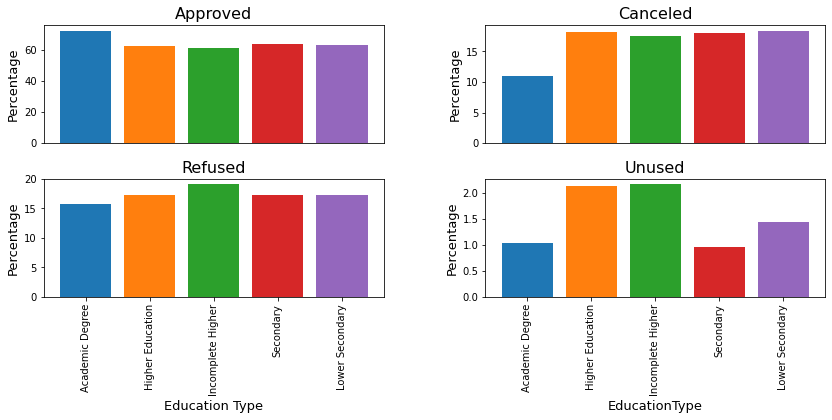

In [79]:
plt.figure(figsize=(14,5))
k1=df_main.groupby([df_main['NAME_EDUCATION_TYPE'],df_main['NAME_CONTRACT_STATUS']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(2,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Canceled', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,3)
k1.iloc[:,2].plot(kind='bar',color=c,width=0.8)
plt.title('Refused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Education Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0,1,2,3,4],['Academic Degree','Higher Education','Incomplete Higher','Secondary','Lower Secondary'],rotation=90)

plt.subplot(2,2,4)
k1.iloc[:,3].plot(kind='bar',color=c,width=0.8)
plt.title('Unused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('EducationType',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0,1,2,3,4],['Academic Degree','Higher Education','Incomplete Higher','Secondary','Lower Secondary'],rotation=90)

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show() 

**Inference**
- We see that clients with Academic degree have the highest probability for their loan to be approved and the complete opposite for the clients with lower secondary education

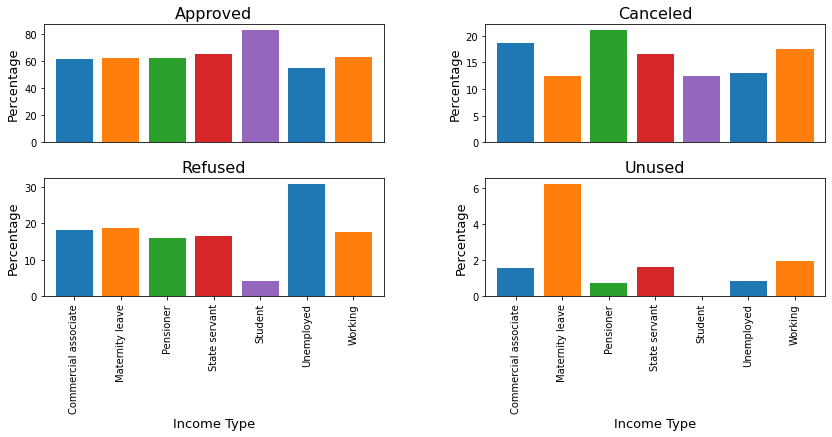

In [80]:
plt.figure(figsize=(14,5))
k1=df_main.groupby([df_main['NAME_INCOME_TYPE'],df_main['NAME_CONTRACT_STATUS']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(2,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Canceled', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,3)
k1.iloc[:,2].plot(kind='bar',color=c,width=0.8)
plt.title('Refused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(2,2,4)
k1.iloc[:,3].plot(kind='bar',color=c,width=0.8)
plt.title('Unused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Type',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show() 

**Inference**
- We see that bank is reluctant to give credit to unemployed whereas the Students were given loan more freely. One reason can be that most of the student may be taking educational loan which they are paying back easily
- Also probability of giving credit to working class, state servant, pensioner and commercial associate are fairly equal however state servants have a small edge others for obvious reasons 

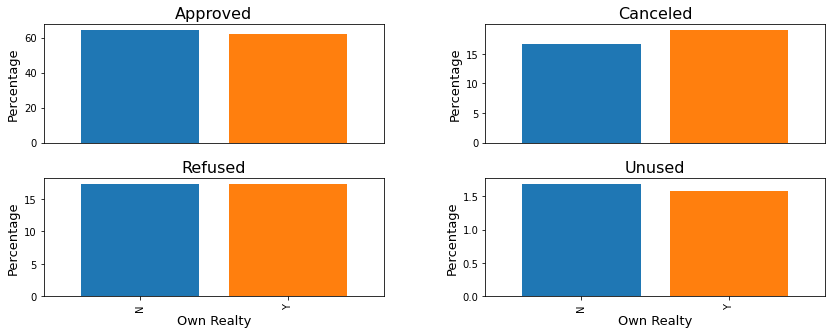

In [81]:
plt.figure(figsize=(14,5))
k1=df_main.groupby([df_main['FLAG_OWN_REALTY'],df_main['NAME_CONTRACT_STATUS']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100
c=tuple(["tab:blue", "tab:orange","tab:green","tab:red","tab:purple"])

plt.subplot(2,2,1)
k1.iloc[:,0].plot(kind='bar',color=c,width=0.8)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,2)
k1.iloc[:,1].plot(kind='bar',color=c,width=0.8)
plt.title('Canceled', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([],rotation='vertical')

plt.subplot(2,2,3)
k1.iloc[:,2].plot(kind='bar',color=c,width=0.8)
plt.title('Refused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own Realty',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(2,2,4)
k1.iloc[:,3].plot(kind='bar',color=c,width=0.8)
plt.title('Unused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Own Realty',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Percentage',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show() 

**Inference**
- Owning a Realty is not a good indicator of defaultness with customers or their loan being approved or not

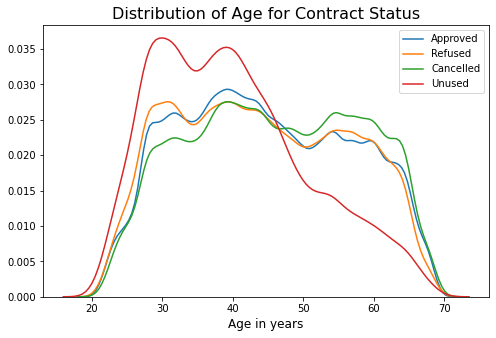

In [82]:
plt.figure(figsize=(8,5))
sns.distplot(df_main_A['DAYS_BIRTH'].div(365),hist=False,label='Approved')
sns.distplot(df_main_R['DAYS_BIRTH'].div(365),hist=False,label='Refused')
sns.distplot(df_main_C['DAYS_BIRTH'].div(365),hist=False,label='Cancelled')
sns.distplot(df_main_U['DAYS_BIRTH'].div(365),hist=False,label='Unused')
plt.title('Distribution of Age for Contract Status',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Age in years',fontdict={'fontsize': 12,'fontweight': 12,'color': 'black'})
plt.show()

**Inference**
- We see the pattern is almost same for all categories of contract status

#### Bivariate Analysis

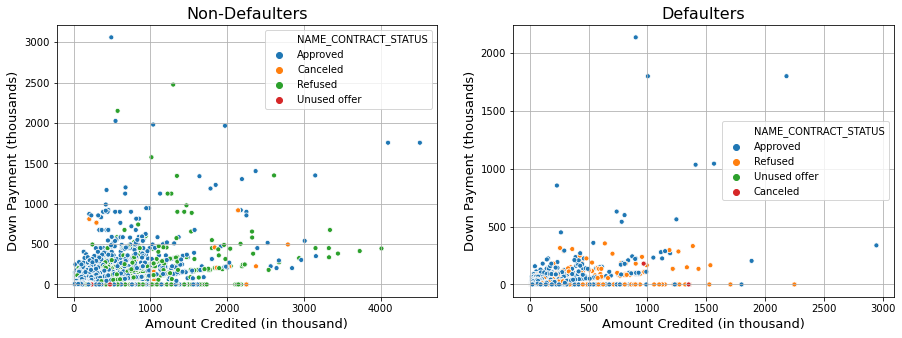

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(df_main_0.AMT_CREDIT_P.div(1000),df_main_0.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_0.NAME_CONTRACT_STATUS)
plt.title('Non-Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(df_main_1.AMT_CREDIT_P.div(1000),df_main_1.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_1.NAME_CONTRACT_STATUS)
plt.title('Defaulters',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference**
- No Strong Inference can be extracted

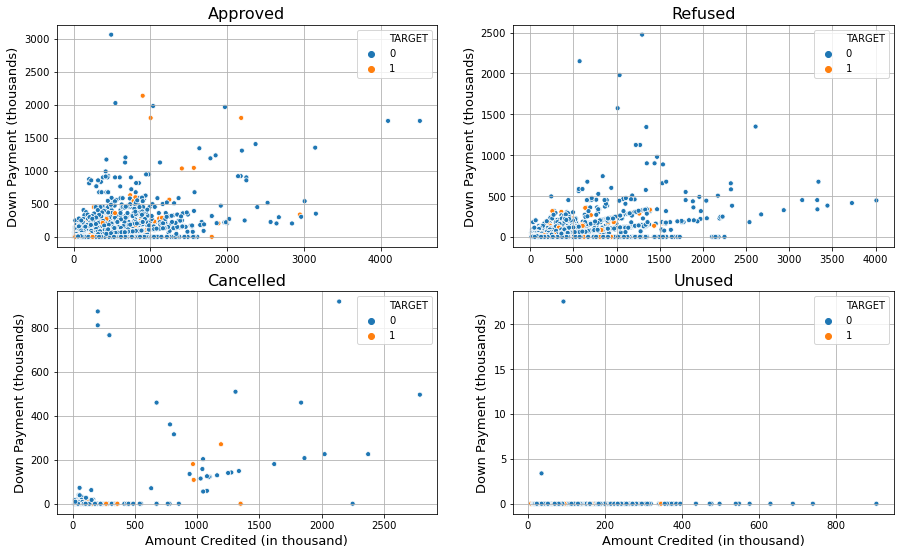

In [84]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.scatterplot(df_main_A.AMT_CREDIT_P.div(1000),df_main_A.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_A.TARGET)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,2)
sns.scatterplot(df_main_R.AMT_CREDIT_P.div(1000),df_main_R.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_R.TARGET)
plt.title('Refused',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,3)
sns.scatterplot(df_main_C.AMT_CREDIT_P.div(1000),df_main_C.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_C.TARGET)
plt.title('Cancelled',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,4)
sns.scatterplot(df_main_U.AMT_CREDIT_P.div(1000),df_main_U.AMT_DOWN_PAYMENT.div(1000),s=25,hue=df_main_U.TARGET)
plt.title('Unused',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Down Payment (thousands)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference**
- No strong inference can be made however we see that many refused loans have been Non defaulters and some of the previously approved ones are defaulters

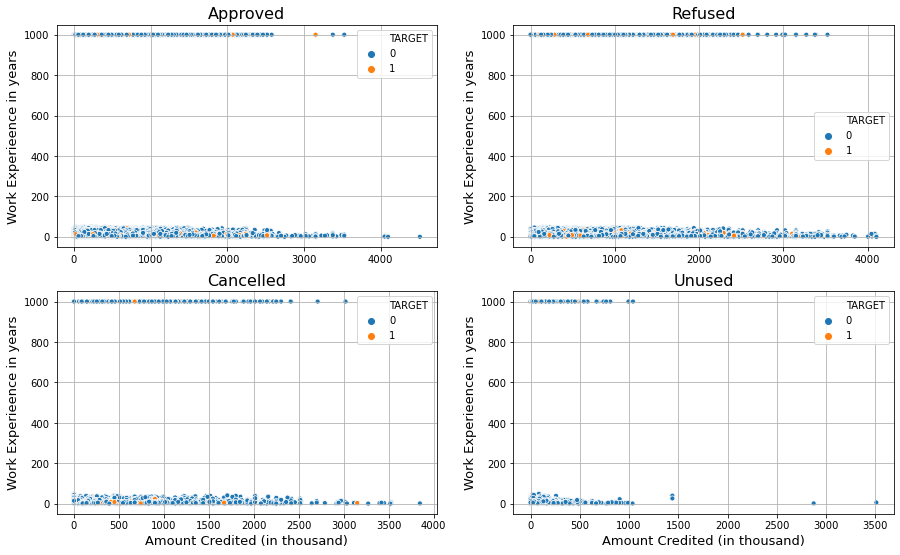

In [85]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.scatterplot(df_main_A.AMT_CREDIT_P.div(1000),df_main_A.DAYS_EMPLOYED.div(365),s=25,hue=df_main_A.TARGET)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experieence in years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,2)
sns.scatterplot(df_main_R.AMT_CREDIT_P.div(1000),df_main_R.DAYS_EMPLOYED.div(365),s=25,hue=df_main_R.TARGET)
plt.title('Refused',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experieence in years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,3)
sns.scatterplot(df_main_C.AMT_CREDIT_P.div(1000),df_main_C.DAYS_EMPLOYED.div(365),s=25,hue=df_main_C.TARGET)
plt.title('Cancelled',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experieence in years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.subplot(2,2,4)
sns.scatterplot(df_main_U.AMT_CREDIT_P.div(1000),df_main_U.DAYS_EMPLOYED.div(365),s=25,hue=df_main_U.TARGET)
plt.title('Unused',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Work Experieence in years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xlabel('Amount Credited (in thousand)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.grid()

plt.show()

**Inference**
- No strong inference can be made as the plot is equally spread over the space for all contract status types, the only difference is the imbalance between the categories of contract status and hence unequal number of data points

In [177]:
df_main.groupby(by = 'NAME_CLIENT_TYPE')['CODE_REJECT_REASON'].count()

NAME_CLIENT_TYPE
New           259540
Refreshed     114936
Repeater     1037682
XNA             1543
Name: CODE_REJECT_REASON, dtype: int64

<Figure size 432x288 with 0 Axes>

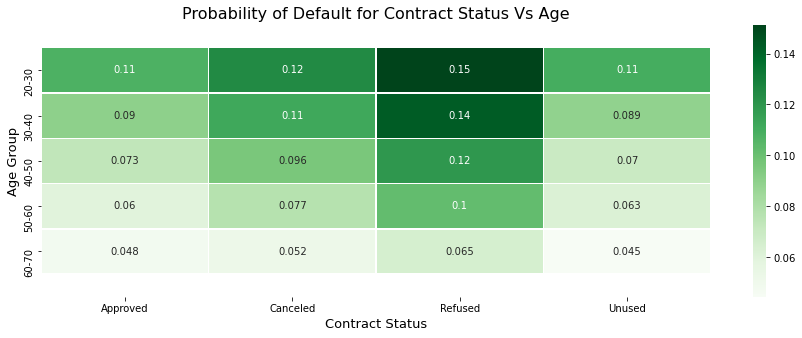

In [86]:
plt.figure(2)
plt.figure(figsize=[15,5])
df_main['TARGET'] = df_main['TARGET'].astype(int) 
df_main_f =df_main.pivot_table(index=['AGE'],columns=['NAME_CONTRACT_STATUS'],values =['TARGET'],aggfunc=np.mean)
sns.heatmap(df_main_f, cmap='Greens',annot=True,linewidth=0.5)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for Contract Status Vs Age',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Contract Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Age Group',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0.5,1.5,2.5,3.5],['Approved','Canceled','Refused','Unused'],rotation='horizontal')
plt.show()

**Inference**
- We can state that the approved cases of highest age group has least probability of default and as the age decreases the default increase
- Also we observe that the highest probability of default is in the lowest age group of refused category which is a good indicator that bank is doing good in refusing credit to probable defaulters

<Figure size 432x288 with 0 Axes>

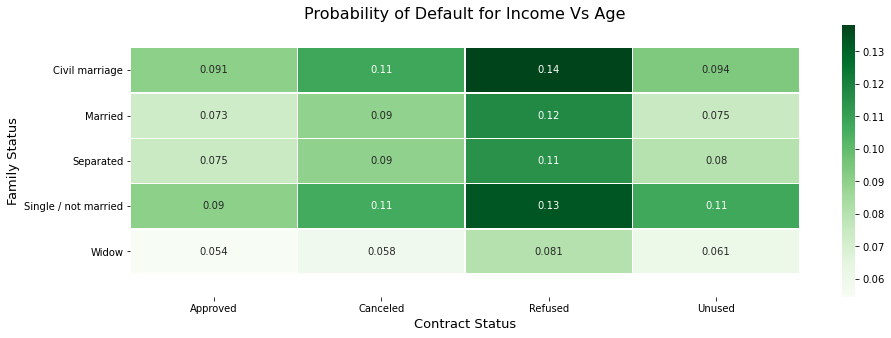

In [87]:
plt.figure(2)
plt.figure(figsize=[15,5])
df_main['TARGET'] = df_main['TARGET'].astype(int) 
df_main_f =df_main.pivot_table(index=['NAME_FAMILY_STATUS'],columns=['NAME_CONTRACT_STATUS'],values =['TARGET'],aggfunc=np.mean)
sns.heatmap(df_main_f, cmap='Greens',annot=True,linewidth=0.5)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Probability of Default for Income Vs Age',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Contract Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Family Status',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([0.5,1.5,2.5,3.5],['Approved','Canceled','Refused','Unused'],rotation='horizontal')
plt.show()

**Inference**
- We can state that in each case the customers with family status of single cases or civil marriage have high probabilty of default in general
- Also we observe that the highest probability of default is in the refused category which is a good indicator that bank is doing good in refusing credit to probable defaultersd

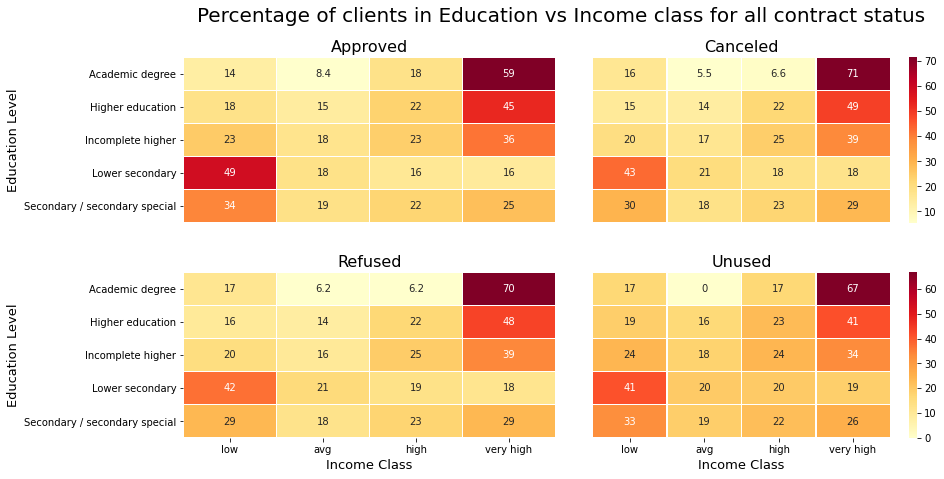

In [88]:
plt.figure(figsize=(14,7))
k1=df_main_A.groupby([df_main_A['NAME_EDUCATION_TYPE'],df_main_A['AMT_INCOME_CLASS']]).size().unstack(level=1) 
a1=k1[:].sum(axis=1)
k1=k1.iloc[:].div(a1,axis=0)*100

k2=df_main_R.groupby([df_main_R['NAME_EDUCATION_TYPE'],df_main_R['AMT_INCOME_CLASS']]).size().unstack(level=1) 
a2=k2[:].sum(axis=1)
k2=k2.iloc[:].div(a2,axis=0)*100

k3=df_main_C.groupby([df_main_C['NAME_EDUCATION_TYPE'],df_main_C['AMT_INCOME_CLASS']]).size().unstack(level=1) 
a3=k3[:].sum(axis=1)
k3=k3.iloc[:].div(a3,axis=0)*100

k4=df_main_U.groupby([df_main_U['NAME_EDUCATION_TYPE'],df_main_U['AMT_INCOME_CLASS']]).size().unstack(level=1) 
a4=k4[:].sum(axis=1)
k4=k4.iloc[:].div(a4,axis=0)*100

plt.suptitle('Percentage of clients in Education vs Income class for all contract status',fontsize=20)
plt.subplot(2,2,1)
sns.heatmap(k1, cmap='YlOrRd',annot=True,linewidth=0.5,cbar=False)
plt.title('Approved',fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Education Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([])

plt.subplot(2,2,2)
sns.heatmap(k2, cmap='YlOrRd',annot=True,linewidth=0.5)
plt.title('Canceled', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
sns.heatmap(k3, cmap='YlOrRd',annot=True,linewidth=0.5,cbar=False)
plt.title('Refused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Class',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Education Level',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(2,2,4)
sns.heatmap(k4, cmap='YlOrRd',annot=True,linewidth=0.5)
plt.title('Unused', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income Class',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.yticks([])


plt.subplots_adjust(wspace=0.1,hspace=0.3)
plt.show() 

**Inference**
- We see that clients with academic degree has highest income class in all contract status cases
- The lowest are among the clients having lower secondary education in all contract cases
- We see that many of the people with academic degree as well as high income are refused the credit which can be avoided in future

#### Correlation for Approved cases

In [89]:
corr=df_main_A.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(5)

,var1,var2,Correlation,Correlation_Abs
59,DAYS_EMPLOYED,DAYS_BIRTH,0.635728,0.635728
47,DAYS_BIRTH,EXT_SOURCE_1,0.603871,0.603871
56,DAYS_EMPLOYED,EXT_SOURCE_1,0.310365,0.310365
79,AMT_DOWN_PAYMENT,AMT_CREDIT_P,0.266408,0.266408
29,EXT_SOURCE_2,EXT_SOURCE_1,0.197595,0.197595


#### Correlation for Refused cases

In [90]:
corr=df_main_R.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(5)

,var1,var2,Correlation,Correlation_Abs
59,DAYS_EMPLOYED,DAYS_BIRTH,0.610455,0.610455
47,DAYS_BIRTH,EXT_SOURCE_1,0.608790,0.608790
79,AMT_DOWN_PAYMENT,AMT_CREDIT_P,0.379962,0.379962
9,AMT_CREDIT_A,AMT_INCOME_TOTAL,0.343512,0.343512
56,DAYS_EMPLOYED,EXT_SOURCE_1,0.296943,0.296943


#### Correlation for Cancelled cases

In [91]:
corr=df_main_C.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(5)

,var1,var2,Correlation,Correlation_Abs
59,DAYS_EMPLOYED,DAYS_BIRTH,0.642190,0.642190
47,DAYS_BIRTH,EXT_SOURCE_1,0.600501,0.600501
79,AMT_DOWN_PAYMENT,AMT_CREDIT_P,0.441049,0.441049
56,DAYS_EMPLOYED,EXT_SOURCE_1,0.327174,0.327174
9,AMT_CREDIT_A,AMT_INCOME_TOTAL,0.318984,0.318984


#### Correlation for Unused cases

In [92]:
corr=df_main_U.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns= ['var1','var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_Abs',ascending=False,inplace=True)
corr_df.head(5)

,var1,var2,Correlation,Correlation_Abs
47,DAYS_BIRTH,EXT_SOURCE_1,0.559725,0.559725
59,DAYS_EMPLOYED,DAYS_BIRTH,0.545913,0.545913
56,DAYS_EMPLOYED,EXT_SOURCE_1,0.234400,0.234400
29,EXT_SOURCE_2,EXT_SOURCE_1,0.220549,0.220549
49,DAYS_BIRTH,EXT_SOURCE_3,0.187079,0.187079


**Inference**
- The top 5 correlation for Cancelled and Refused cases are same
- In all the cases the attributes having highest correlation are DAYS_BIRTH and EXT_SOURCE_1. Also we see in all cases EXT_SOURCE_1 has a correlation with DAYS_EMPLOYED also. One reason might be that this external score 1 is based on age and work experience of a client
- We see a correlation between DAYS_EMPLOYED and DAYS_BIRTH which is obvious as they are typically dependent 


### Conclusion for Bank's Purpose
We have gathered some good insights which can be used as rules by the bank in future cases for decision making.

**Rules**:
- Education level is a Deriving variable in Decision making, higher degree holders are less likely to become defaulters, it is suggested to set  Credit limit for applicants having lower education Status.

- AMT_CREDIT and AMT_INCOME_TOTAL have a decent correlation(0.45) for non-Defaulters,suggests that the Income should be considered while setting the AMT_CREDIT to avoid Default .

- Customers having EXT source Score greater than 0.45 across all external source are less likely to default.

- State Servants and Pensioners are the Qualified Working class[data samples] are less likely to default.

- Customers owning a Realty and Car  are less likely to default.

- The SOCR is the best metric to investigate for decision making also it is suggested to set Credit limit.

- Older AGE Groups are less likely to default.   

- For customers having  Experience between 10-20 yrs., it is suggested to look into Owning a Realty and type of Income to set  Credit limits or Higher Interest rates.


**Driving Features**: 
- NAME_EDUCATION_TYPE
- EXT Source
- Owning CAR/Realty
- NAME_INCOME_TYPE         
- AMT_INCOME_TOTAL & AMT_CREDIT
- AGE GROUP